In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Logistic Regression
### 1.1 Plotting the data

In [331]:
data_path = '/Users/Jonathan/Documents/Coursera/ML/machine-learning-ex2/ex2/ex2data1.txt'

with open(data_path) as f:
    data = [i.split(',') for i in f.read().splitlines()]
    data = np.array(data).astype(float)

In [332]:
df_data = pd.DataFrame(data, columns = ['E1', 'E2', 'Label'])

X = data[:, [0,1]]
y = data[:, 2]
# m = X.shape[0]
# n = X.shape[1]
m, n = X.shape

Text(0,0.5,'Exam 2 Score')

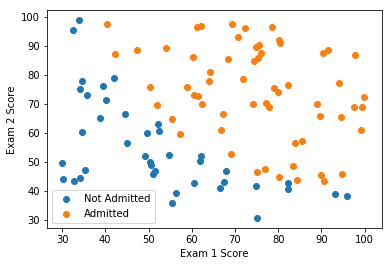

In [333]:
plt.scatter(df_data.E1[df_data.Label == 0], df_data.E2[df_data.Label == 0], label='Not Admitted')
plt.scatter(df_data.E1[df_data.Label == 1], df_data.E2[df_data.Label == 1], label='Admitted')
    
plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

## 1.2 Implementation
### 1.2.1 Warmup exercise: Sigmoid Function

In [334]:
def sigmoid(X):
    
    return 1 / (1 + np.exp(-X))

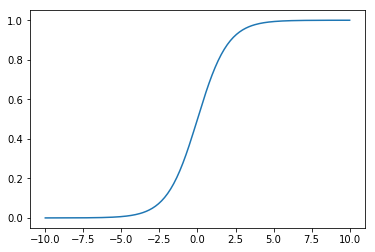

In [335]:
# Test vector input
plt.plot(np.linspace(-10, 10, 200), sigmoid(np.linspace(-10, 10, 200)))

### 1.2.2 Cost Function & Gradient

In [349]:
def costFunction(theta, X, y, grad=False):
    """
    Compute cost and gradient for logistic regression
    J = costFunction(theta, X, y) computes the cost of using theta as the
    parameter for logistic regression and the gradient of the cost
    w.r.t. to the parameters.
    """
    
    m = len(y)
    y_hat = sigmoid(np.dot(X, theta))
    
    J = (np.sum((-y * np.log(y_hat)) - ((1-y) * np.log(1-y_hat)))) / m
    #J = ((np.dot(np.transpose(-y), np.log(y_hat))) - np.dot(np.transpose(1-y), np.log(1-y_hat))) / m
        
    if grad == True:
        grad = np.dot(np.transpose(X), (y_hat - y)) / m
        
        return J, grad
    
    else:
        return J
    
    
def Gradient(theta, X, y):
    
    m = len(y)
    y_hat = sigmoid(np.dot(X, theta))    
    
    grad = np.dot(np.transpose(X), (y_hat - y)) / m
    
    return grad

In [337]:
X = np.column_stack([np.ones(m), X])

In [338]:
theta = np.zeros(n+1)
print(theta)

[0. 0. 0.]


In [339]:
# Compute and display initial cost and gradient
# Expected cost (approx): 0.693
# Expected gratidents (approx): [-0.1000, -12.0092, -11.2628]
cost, grad = costFunction(theta, X, y, True)

print('Cost at initial theta (zeros): %f' % cost);
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros): %s' % list(grad));
print('Expected gradients (approx): [-0.1000, -12.0092, -11.2628]');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693

Gradient at initial theta (zeros): [-0.1, -12.009216589291151, -11.262842205513593]
Expected gradients (approx): [-0.1000, -12.0092, -11.2628]


In [340]:
# More tests:
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y, True);

print('\nCost at test theta: %f' % cost);
print('Expected cost (approx): 0.218\n');
print('Gradient at test theta: %s' % str(grad));
print('Expected gradients (approx): [0.043, 2.566, 2.647]');



Cost at test theta: 0.218330
Expected cost (approx): 0.218

Gradient at test theta: [0.04290299 2.56623412 2.64679737]
Expected gradients (approx): [0.043, 2.566, 2.647]


### 1.2.3 Learning parameters using scipy.optimize
(fminunc for Matlab/Octave)

In [341]:
from scipy import optimize

In [342]:
theta_opt = optimize.fmin(costFunction, x0=theta, args=(X, y), disp=1)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [343]:
theta_opt

array([-25.16130062,   0.20623142,   0.20147143])

### 1.2.4 Evaluating Logistic Regression

In [344]:
x_test = np.array([1, 45, 85])
sigmoid(theta_opt.dot(x_test))

0.7762915904112411

Text(0,0.5,'Exam 2 Score')

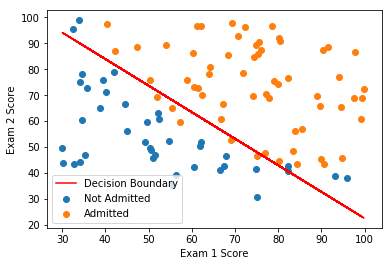

In [348]:
plt.scatter(df_data.E1[df_data.Label == 0], df_data.E2[df_data.Label == 0], label='Not Admitted')
plt.scatter(df_data.E1[df_data.Label == 1], df_data.E2[df_data.Label == 1], label='Admitted')
plt.plot( X[:, 1], -(theta_opt[0] + theta_opt[1]*X[:, 1])/theta_opt[2], label = 'Decision Boundary', color='r')

plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

In [291]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic 
    regression parameters theta
    p = PREDICT(theta, X) computes the predictions for X using a 
    threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    """

    m = X.shape[0]; # Number of training examples    
    
    y_hat =  sigmoid(X.dot(theta))
    
    p = y_hat
    p[p < 0.5] = 0
    p[p >= 0.5] = 1
    
    return p

In [292]:
predict(theta_opt, X)

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])

In [293]:
prob = sigmoid(np.array([1, 45, 85]).dot(theta_opt));
print('For a student with scores 45 and 85, we predict an admission probability of %s' % prob);
print('Expected value: 0.775 +/- 0.002\n');

# Compute accuracy on our training set
p = predict(theta_opt, X);

print('Train Accuracy: %f' % (np.mean(np.double(p == y)) * 100));
print('Expected accuracy (approx): 89.0');


For a student with scores 45 and 85, we predict an admission probability of 0.7762915904112411
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.000000
Expected accuracy (approx): 89.0


#### Playing around to get a better fit!
Let's try a quadratic

In [479]:
df_data = pd.DataFrame(data, columns = ['E1', 'E2', 'Label'])

X = data[:, [0,1]]
y = data[:, 2]
# m = X.shape[0]
# n = X.shape[1]
m, n = X.shape; print(m, n)

100 2


In [495]:
# X = [1, x_1, x_2, x_1**2, x_2**2, x_1 * x_2]
X = np.column_stack([np.ones(m), X, X**2, X[:, 0]*X[:, 1]])
m, n = X.shape; print(m, n)
theta = np.zeros(n)

100 14


In [481]:
theta_opt = optimize.fmin(costFunction, x0=theta, args=(X, y), disp=1)

Optimization terminated successfully.
         Current function value: 0.088924
         Iterations: 306
         Function evaluations: 491


/Users/Jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/Users/Jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


In [482]:
theta_opt

array([ 0.0211857 , -0.5234961 , -0.13598919,  0.0020087 , -0.00088996,
        0.01028182])

Solving for x2 (using quadratic formula) to get decision boundary:

In [483]:
a = theta_opt[4]
b = theta_opt[2] + theta_opt[5]*X[:, 1]
c = theta_opt[0] + theta_opt[1]*X[:, 1] + theta_opt[3]* X[:, 3]

x_2_boundary = (-b + np.sqrt((b**2) - (4*a*c))) / (2*a)

/Users/Jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


Text(0,0.5,'Exam 2 Score')

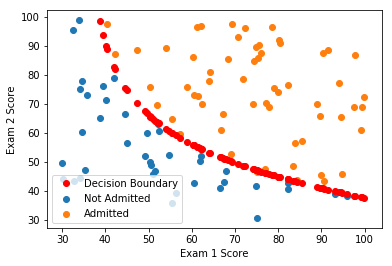

In [485]:
plt.scatter(df_data.E1[df_data.Label == 0], df_data.E2[df_data.Label == 0], label='Not Admitted')
plt.scatter(df_data.E1[df_data.Label == 1], df_data.E2[df_data.Label == 1], label='Admitted')
plt.plot( X[:, 1]
         , x_2_boundary
         , 'o'
         , label = 'Decision Boundary', color='r')

plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

Looks reasonable!

In [486]:
predict(theta_opt, X)

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [494]:
prob = sigmoid(np.array([1, 45, 85, 45**2, 85**2, 45*85]).dot(theta_opt));
print('For a student with scores 45 and 85, we predict an admission probability of %s' % prob);

# Compute accuracy on our training set
p = predict(theta_opt, X);

print('Train Accuracy: %f \n' % (np.mean(np.double(p == y)) * 100));

For a student with scores 45 and 85, we predict an admission probability of 0.8665063735699885
Train Accuracy: 99.000000 



Training accuracy is considerably better as expected

## 2 Regulatized Logistic Regression
### 2.1 Visualizing the data

In [322]:
data_path = '/Users/Jonathan/Documents/Coursera/ML/machine-learning-ex2/ex2/ex2data2.txt'
data = np.loadtxt(data_path, delimiter=',')
X = data[:, [0,1]]
y = data[:, 2]
m = X.shape[0]; print(m)

118


Text(0,0.5,'Microchip Test 2')

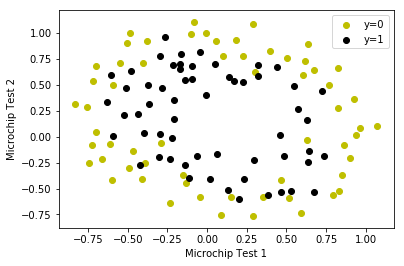

In [321]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], label = 'y=0', color='y')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label = 'y=1', color='k')
plt.legend()
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

In [323]:
np.column_stack([np.ones(m), X, X**2])

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01,
         2.62830529e-03,  4.89384194e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01,
         8.60107856e-03,  4.69142804e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01,
         4.56719641e-02,  4.79210063e-01],
       [ 1.00000000e+00, -3.75000000e-01,  5.02190000e-01,
         1.40625000e-01,  2.52194796e-01],
       [ 1.00000000e+00, -5.13250000e-01,  4.65640000e-01,
         2.63425562e-01,  2.16820610e-01],
       [ 1.00000000e+00, -5.24770000e-01,  2.09800000e-01,
         2.75383553e-01,  4.40160400e-02],
       [ 1.00000000e+00, -3.98040000e-01,  3.43570000e-02,
         1.58435842e-01,  1.18040345e-03],
       [ 1.00000000e+00, -3.05880000e-01, -1.92250000e-01,
         9.35625744e-02,  3.69600625e-02],
       [ 1.00000000e+00,  1.67050000e-02, -4.04240000e-01,
         2.79057025e-04,  1.63409978e-01],
       [ 1.00000000e+00,  1.31910000e-01, -5.13890000e-01,
         1.74002481e-02